In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data = pd.read_csv("./Raemian_final.csv")

In [3]:
data

,계약년월,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,202101,2020,강남구,"10,589,107","6,436,523",97.0,"5,762","3,550","25,979.03","22,748.79",...,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10,10848.092020
1,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10951.256930
2,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11919.915870
3,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,10951.256930
4,202105,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71","19,920.09",...,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17,11919.915870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,202011,2011,중구,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45","22,428.73",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,5754.974222
7858,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5644.301640
7859,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,5865.646803
7860,202012,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82","29,943.84",...,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29,4979.302424


In [4]:
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [5]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


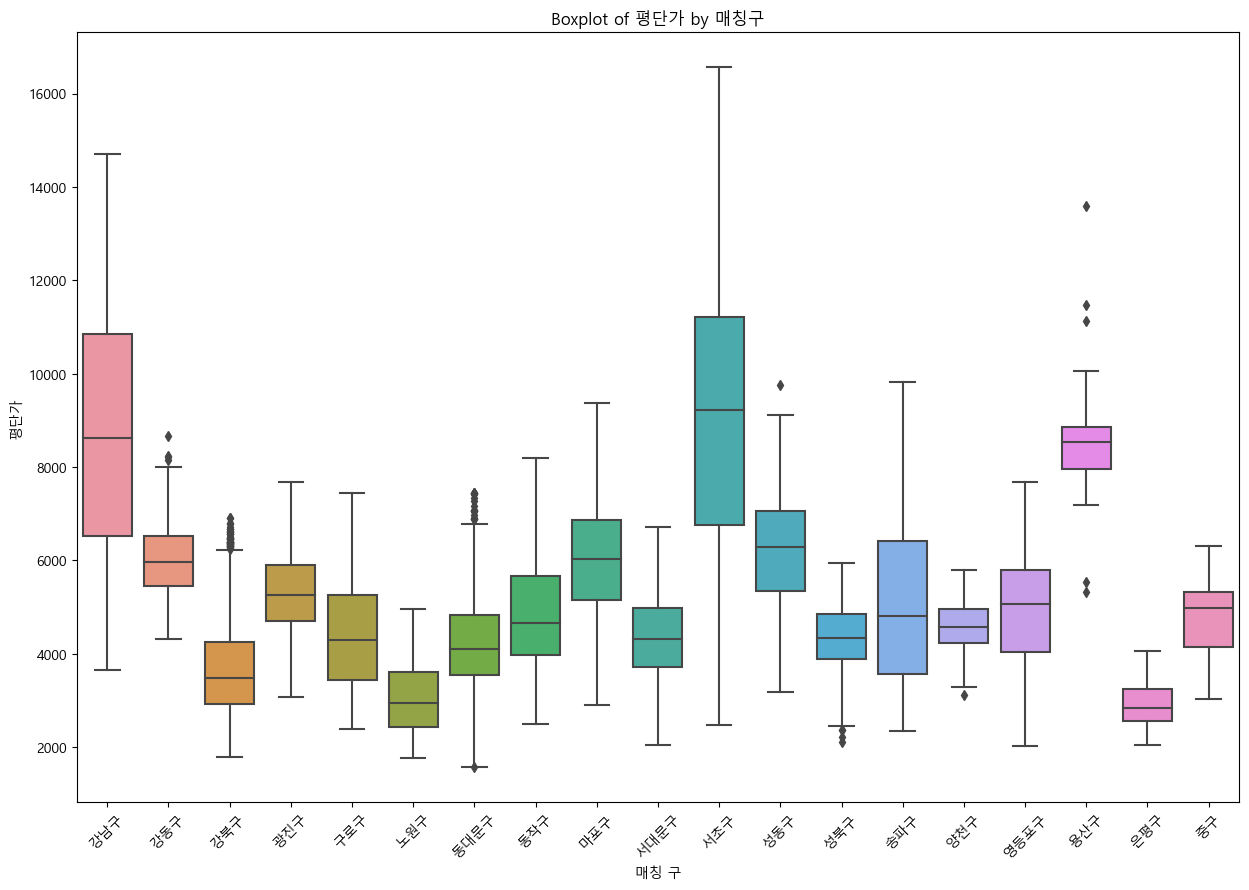

매칭 구
강남구     8674.164527
강동구     6020.686443
강북구     3565.851781
광진구     5374.192639
구로구     4445.779189
노원구     3045.075305
동대문구    4210.389947
동작구     4885.487254
마포구     6009.011530
서대문구    4367.858973
서초구     8796.471313
성동구     6220.406251
성북구     4354.253754
송파구     5047.007055
양천구     4611.659480
영등포구    4972.332396
용산구     8495.192030
은평구     2925.701758
중구      4784.354895
Name: 평당가, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6519.06299975
상위 25% :  10841.5823775
강남구 평균 평당가:  8674.164527013354
강남구 전체 개수 : 674
강남구 필터링 개수 674
이상치 개수(제거) : 0


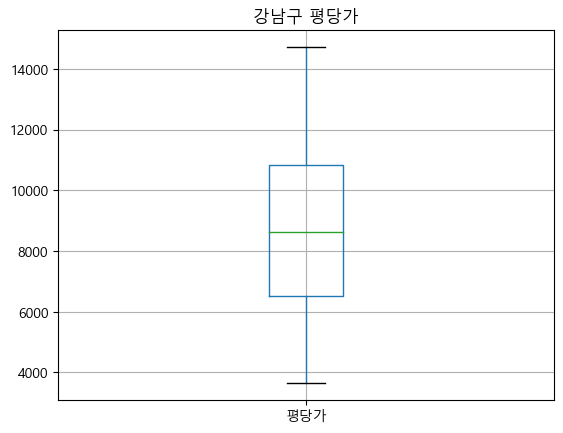

하위 25% :  5455.742072
상위 25% :  6526.7925595
강동구 평균 평당가:  6044.235382082051
강동구 전체 개수 : 390
강동구 필터링 개수 386
이상치 개수(제거) : 4


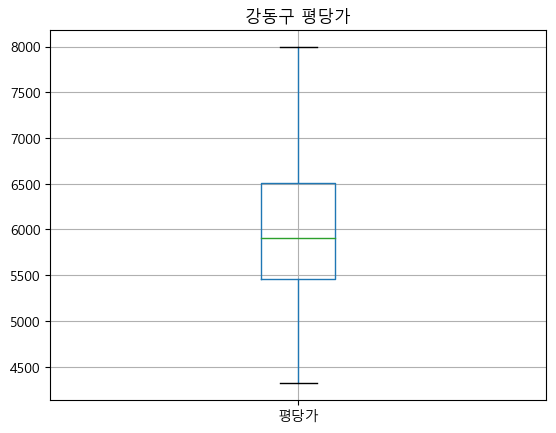

하위 25% :  2931.12397075
상위 25% :  4252.2650075
강북구 평균 평당가:  3727.2445497604426
강북구 전체 개수 : 814
강북구 필터링 개수 769
이상치 개수(제거) : 45


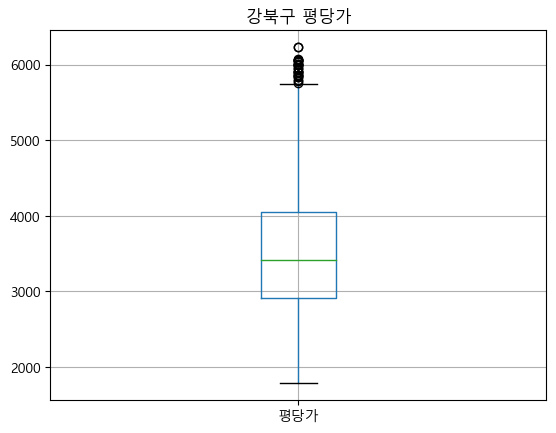

하위 25% :  4697.271623000001
상위 25% :  5904.91815275
광진구 평균 평당가:  5374.1926385480765
광진구 전체 개수 : 312
광진구 필터링 개수 312
이상치 개수(제거) : 0


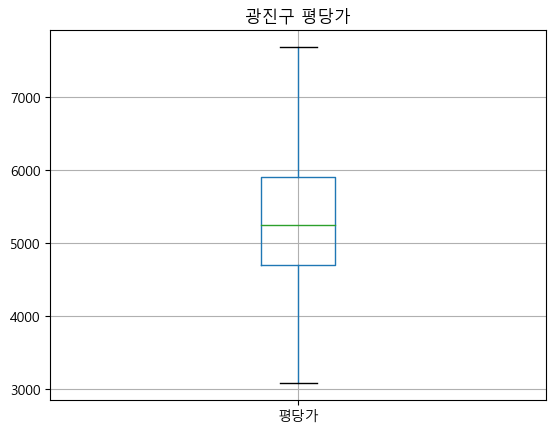

하위 25% :  3445.0929585
상위 25% :  5251.608025
구로구 평균 평당가:  4445.7791894728025
구로구 전체 개수 : 239
구로구 필터링 개수 239
이상치 개수(제거) : 0


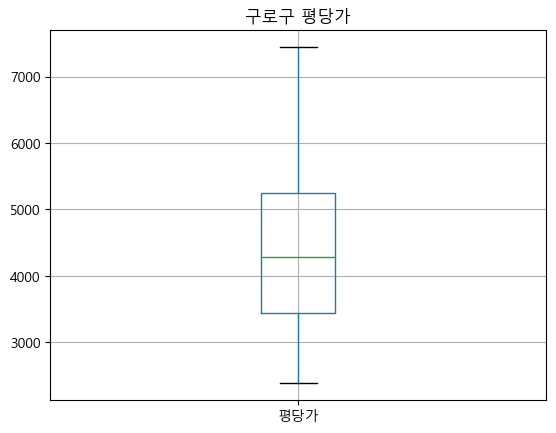

하위 25% :  2441.185883
상위 25% :  3619.605943
노원구 평균 평당가:  3045.075304518797
노원구 전체 개수 : 133
노원구 필터링 개수 133
이상치 개수(제거) : 0


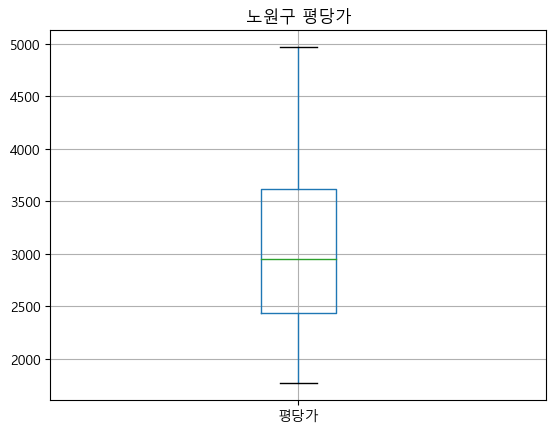

하위 25% :  3536.065484
상위 25% :  4839.829069
동대문구 평균 평당가:  4269.092462889988
동대문구 전체 개수 : 809
동대문구 필터링 개수 791
이상치 개수(제거) : 18


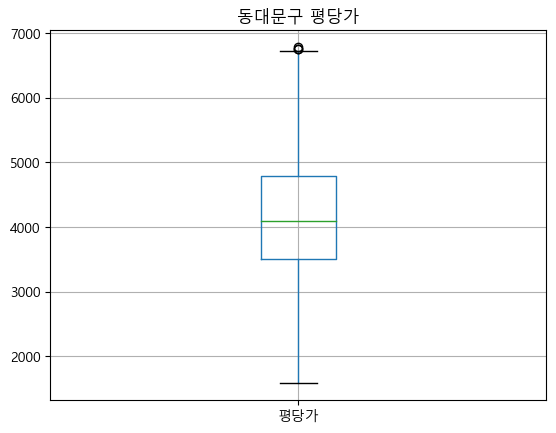

하위 25% :  3969.4465357500003
상위 25% :  5661.321662
동작구 평균 평당가:  4885.487253733173
동작구 전체 개수 : 416
동작구 필터링 개수 416
이상치 개수(제거) : 0


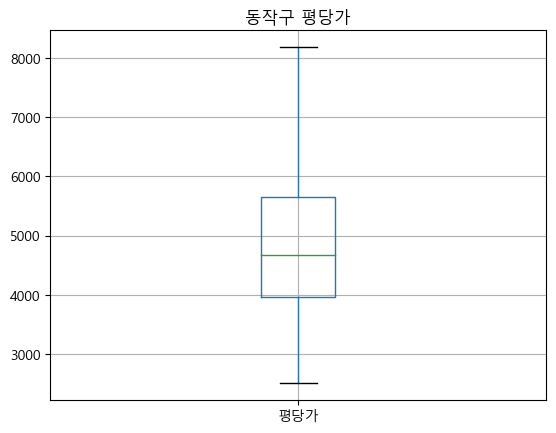

하위 25% :  5152.6742145
상위 25% :  6869.2755925
마포구 평균 평당가:  6009.01153006814
마포구 전체 개수 : 1086
마포구 필터링 개수 1086
이상치 개수(제거) : 0


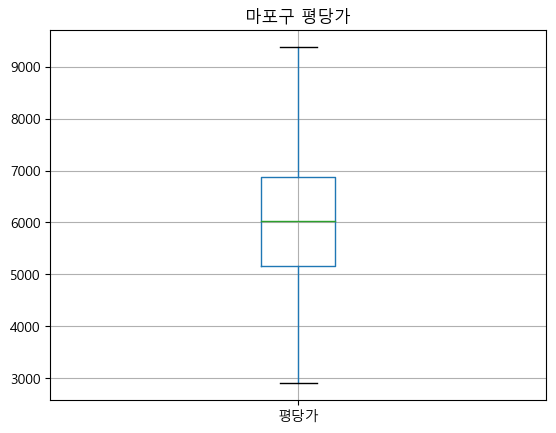

하위 25% :  3726.3387215000002
상위 25% :  4977.169405500001
서대문구 평균 평당가:  4367.8589732977225
서대문구 전체 개수 : 571
서대문구 필터링 개수 571
이상치 개수(제거) : 0


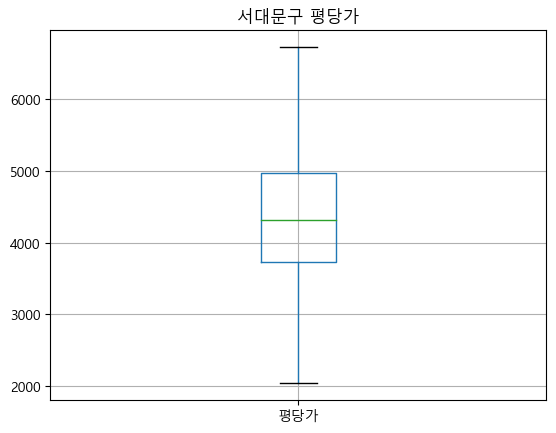

하위 25% :  6755.622018
상위 25% :  11209.953995
서초구 평균 평당가:  8796.471312672102
서초구 전체 개수 : 552
서초구 필터링 개수 552
이상치 개수(제거) : 0


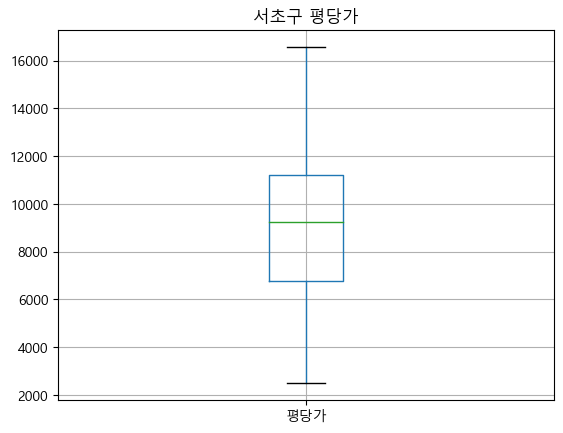

하위 25% :  5335.99712925
상위 25% :  7064.8533072499995
성동구 평균 평당가:  6235.948050793859
성동구 전체 개수 : 228
성동구 필터링 개수 227
이상치 개수(제거) : 1


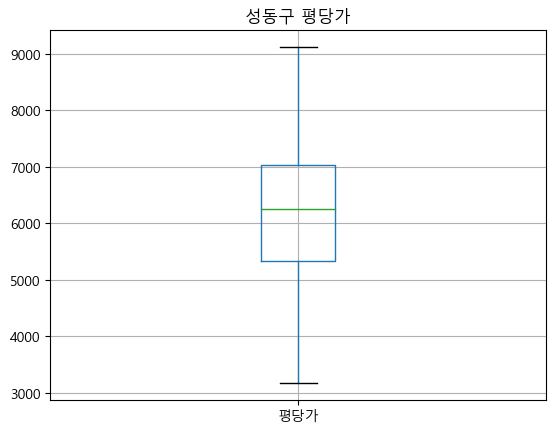

하위 25% :  3884.6504205
상위 25% :  4862.600024
성북구 평균 평당가:  4342.451110223164
성북구 전체 개수 : 708
성북구 필터링 개수 704
이상치 개수(제거) : 4


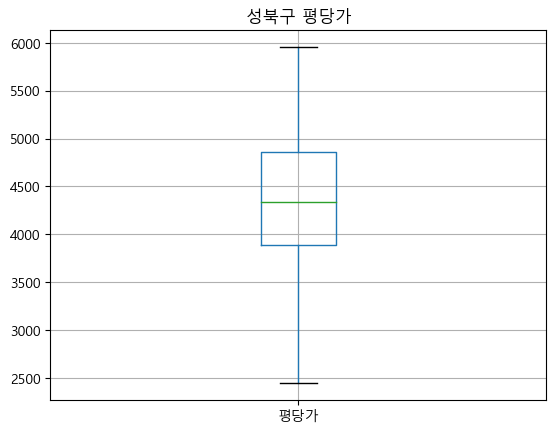

하위 25% :  3569.244888
상위 25% :  6425.211298
송파구 평균 평당가:  5047.007054873562
송파구 전체 개수 : 261
송파구 필터링 개수 261
이상치 개수(제거) : 0


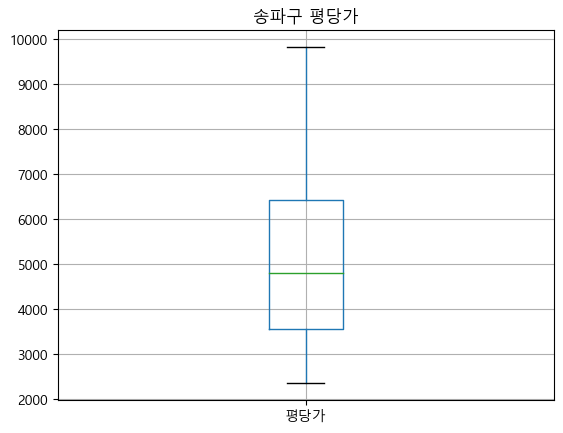

하위 25% :  4033.9681885
상위 25% :  5792.12969875
영등포구 평균 평당가:  4972.332395547369
영등포구 전체 개수 : 380
영등포구 필터링 개수 380
이상치 개수(제거) : 0


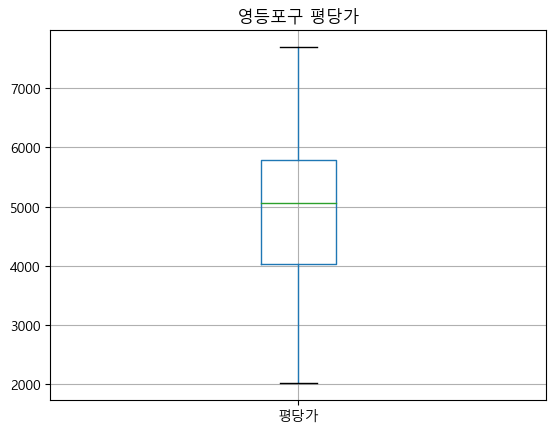

하위 25% :  7963.644844
상위 25% :  8852.605214
용산구 평균 평당가:  8612.078334692307
용산구 전체 개수 : 39
용산구 필터링 개수 34
이상치 개수(제거) : 5


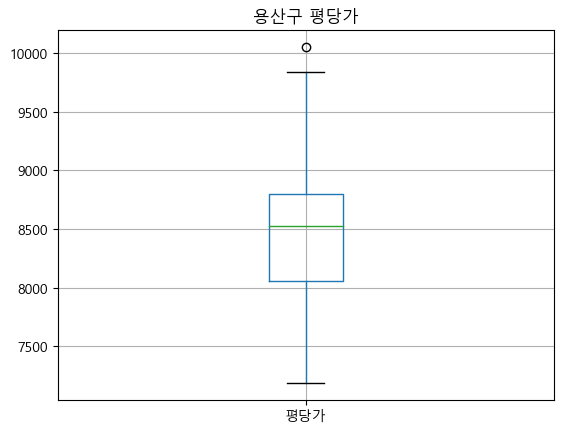

하위 25% :  2555.265126
상위 25% :  3253.576909
은평구 평균 평당가:  2925.7017575135133
은평구 전체 개수 : 37
은평구 필터링 개수 37
이상치 개수(제거) : 0


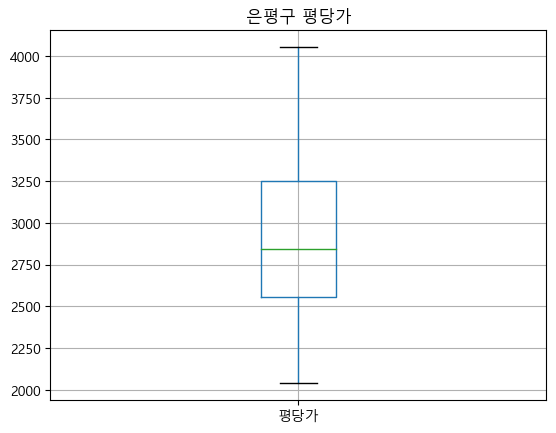

하위 25% :  4237.1909625
상위 25% :  4954.424555
양천구 평균 평당가:  4573.601845102566
양천구 전체 개수 : 39
양천구 필터링 개수 38
이상치 개수(제거) : 1


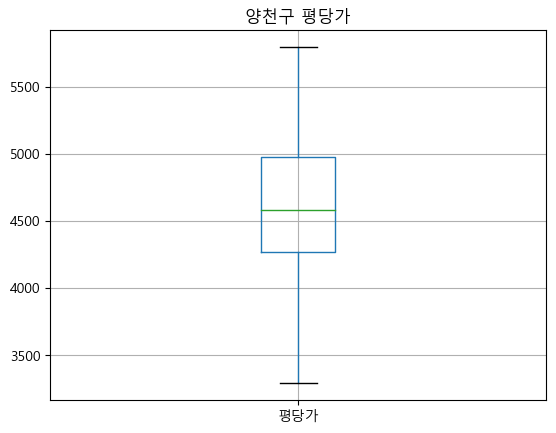

하위 25% :  4139.532257999999
상위 25% :  5329.409626
중구 평균 평당가:  4784.354894597015
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


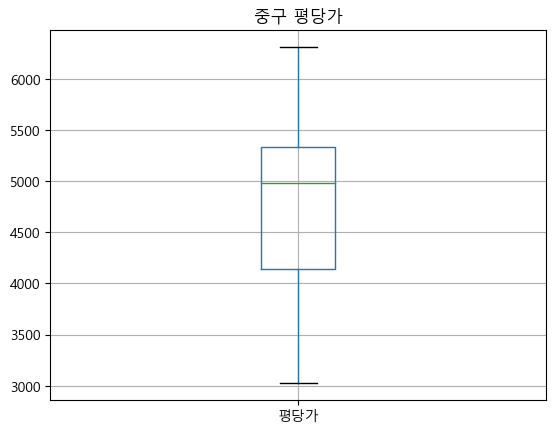

---------------------------------------
전체 시각화


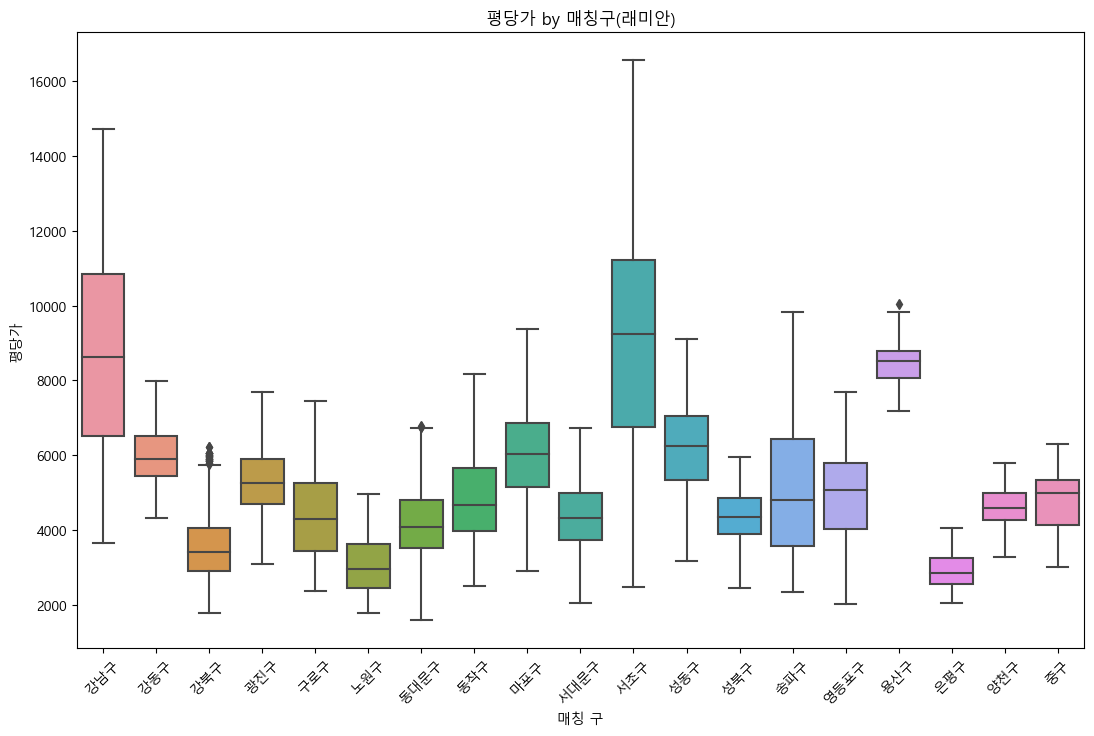

In [7]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



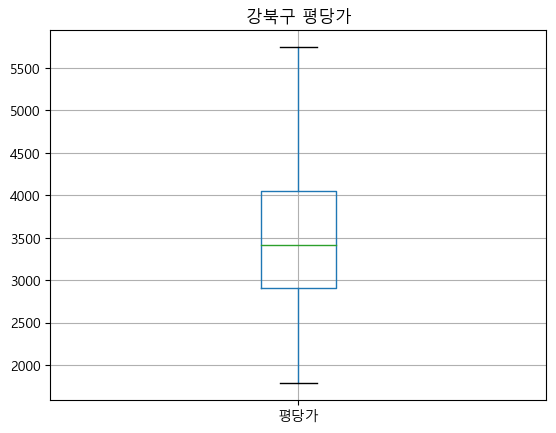

In [8]:
#데이터 문제 없이 이상치 제거
group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [9]:
data = filtered_data_total

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7677 entries, 0 to 7676
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7677 non-null   int64  
 1   건축년도                                7677 non-null   int64  
 2   매칭 구                                7677 non-null   object 
 3   건설수주_건축(단위 백만원)                     7677 non-null   object 
 4   건설수주_주택(단위 백만원)                     7677 non-null   object 
 5   매매가격지수(아파트)                         7677 non-null   float64
 6   경상수지(백만불)                           7677 non-null   object 
 7   무역수지(백만불)                           7677 non-null   object 
 8   대출금액(아파트)(억원)                       7677 non-null   object 
 9   대출잔액(아파트)(억원)                       7677 non-null   object 
 10  서울_신규_분양세대(단위: 세대)                  7677 non-null   object 
 11  아파트 동(호)수_(단위: 호)                   7677 no

In [11]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7677 entries, 0 to 7676
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7677 non-null   int64  
 1   건축년도                                7677 non-null   int64  
 2   매칭 구                                7677 non-null   object 
 3   건설수주_건축(단위 백만원)                     7677 non-null   float64
 4   건설수주_주택(단위 백만원)                     7677 non-null   float64
 5   매매가격지수(아파트)                         7677 non-null   float64
 6   경상수지(백만불)                           7677 non-null   float64
 7   무역수지(백만불)                           7677 non-null   float64
 8   대출금액(아파트)(억원)                       7677 non-null   float64
 9   대출잔액(아파트)(억원)                       7677 non-null   float64
 10  서울_신규_분양세대(단위: 세대)                  7677 non-null   float64
 11  아파트 동(호)수_(단위: 호)                   7677 no

# 정규화

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

ohe = OneHotEncoder(sparse=False)

data_apt_name = ohe.fit_transform(data[['매칭 구']])
#data_road_name = ohe.fit_transform(data[['도로명']])
#data_matching_gu = ohe.fit_transform(data[['매칭 구']])

In [14]:
data_apt_name

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
        '중구'], dtype=object)]

In [16]:
df_apt_name = pd.DataFrame(data_apt_name, columns=[col for col in ohe.categories_[0]])

In [17]:
data = pd.concat([data.drop(columns=['매칭 구']), df_apt_name], axis=1)

In [18]:
data

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,202101,2020,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,22748.79,234.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,202105,2020,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,19920.09,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,202011,2011,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,22428.73,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7673,202012,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,202012,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,202012,2011,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,29943.84,1178.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
        '중구'], dtype=object)]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7677 entries, 0 to 7676
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7677 non-null   int64  
 1   건축년도                                7677 non-null   int64  
 2   건설수주_건축(단위 백만원)                     7677 non-null   float64
 3   건설수주_주택(단위 백만원)                     7677 non-null   float64
 4   매매가격지수(아파트)                         7677 non-null   float64
 5   경상수지(백만불)                           7677 non-null   float64
 6   무역수지(백만불)                           7677 non-null   float64
 7   대출금액(아파트)(억원)                       7677 non-null   float64
 8   대출잔액(아파트)(억원)                       7677 non-null   float64
 9   서울_신규_분양세대(단위: 세대)                  7677 non-null   float64
 10  아파트 동(호)수_(단위: 호)                   7677 non-null   int64  
 11  아파트 건물면적_(천)                        7677 no

# 조건: 계약년도 scaler 진행하였음

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data.iloc[:, :41].values) #평당가 까지만 scaler 진행
oh_data = data.iloc[:, 41 : 60]

In [22]:
data_std

array([[ 0.82109048,  1.69737528, -0.68417726, ...,  0.6422227 ,
        -1.0485208 ,  2.42062168],
       [ 0.88585813,  1.69737528, -0.37752167, ...,  1.04864711,
        -0.42879764,  2.46691935],
       [ 0.88585813,  1.69737528, -0.37752167, ...,  1.04864711,
        -0.42879764,  2.90162774],
       ...,
       [-0.61998975,  0.32731979,  2.53009608, ...,  0.94629404,
         1.06295325,  0.18463268],
       [-0.61998975,  0.32731979,  2.53009608, ...,  0.94629404,
         1.06295325, -0.21313512],
       [-0.61998975,  0.32731979,  2.53009608, ...,  0.94629404,
         1.06295325, -0.23906168]])

In [23]:
oh_data

,강남구,강동구,강북구,광진구,구로구,노원구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## scaler 한 데이터와 one hot encoding한 데이터 합치기

In [24]:
# data_std (NumPy 배열)를 DataFrame으로 변환
# 여기서 columns는 data_std의 열 이름을 지정합니다 (예: ['col1', 'col2', ..., 'colN'])
data_std_df = pd.DataFrame(data_std, columns=data.columns[:41])

# data_std_df와 oh_data를 가로 방향으로 결합
scaled_df = pd.concat([data_std_df, oh_data], axis=1)


# 마지막 매칭구를 제외하고는 나머지 전부 data scaler 진행함

In [25]:
scaled_df

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,0.821090,1.697375,-0.684177,-0.669143,-0.073610,-0.335661,0.157528,0.243998,0.408497,-0.380997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,-0.636182,0.327320,0.122397,0.219880,-0.260701,0.789521,0.994419,0.250660,0.364689,-0.424546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7673,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# VIF를 통한 다중공선성 측정할 때, one-hot encoding 데이터는 빼줘야함!

In [57]:
data_vif = scaled_df.iloc[:, :41]

In [58]:
data_vif #다중공선성 확인할 때, 모델로 돌릴 데이터를 가지고 진행하는 것이 좋음! (일관성 있음)

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,0.821090,1.697375,-0.684177,-0.669143,-0.073610,-0.335661,0.157528,0.243998,0.408497,-0.380997,...,0.212748,0.361301,0.065863,1.128827,0.070432,1.000319,0.208281,0.642223,-1.048521,2.420622
1,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,-1.158815,1.323307,-0.122850,1.449404,-0.243066,1.511009,-0.097862,1.048647,-0.428798,2.466919
2,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,-1.158815,1.323307,-0.122850,1.449404,-0.243066,1.511009,-0.097862,1.048647,-0.428798,2.901628
3,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,-1.158815,1.323307,-0.122850,1.449404,-0.243066,1.511009,-0.097862,1.048647,-0.428798,2.466919
4,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,-1.158815,1.323307,-0.122850,1.449404,-0.243066,1.511009,-0.097862,1.048647,-0.428798,2.901628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,-0.636182,0.327320,0.122397,0.219880,-0.260701,0.789521,0.994419,0.250660,0.364689,-0.424546,...,-0.044428,-0.112126,0.457512,0.173034,1.977958,0.137164,2.031534,0.315704,1.457179,0.134966
7673,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.685633,0.173647,0.351470,0.931346,1.684365,0.769902,1.451563,0.946294,1.062953,0.085299
7674,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.685633,0.173647,0.351470,0.931346,1.684365,0.769902,1.451563,0.946294,1.062953,0.184633
7675,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.685633,0.173647,0.351470,0.931346,1.684365,0.769902,1.451563,0.946294,1.062953,-0.213135


In [59]:
data_vif.isnull().sum()

계약년월                                  0
건축년도                                  0
건설수주_건축(단위 백만원)                       0
건설수주_주택(단위 백만원)                       0
매매가격지수(아파트)                           0
경상수지(백만불)                             0
무역수지(백만불)                             0
대출금액(아파트)(억원)                         0
대출잔액(아파트)(억원)                         0
서울_신규_분양세대(단위: 세대)                    0
아파트 동(호)수_(단위: 호)                     0
아파트 건물면적_(천)                          0
생산자물가지수 총지수                           0
전규모(1인이상) 전체임금총액[원]                   0
소비자물가지수 총지수                           0
소비자물가지수 주택, 수도, 전기 및 연료               0
가계대출 (연리%)                            0
경기종합지수(2020=100)                      0
경제활동인구_ 실업률(단위: %)                    0
경제활동인구_고용률(단위: %)                     0
경제활동인구_취업자(단위: 천명)                    0
국제 주요국 주가지수(KOSPI)                    0
예금은행 대출금리(신규취급액 기준)_대출평균(연%)          0
예금은행 대출금리(잔액 기준)_총대출(연리%)             0
주택매매가격지수(KB)_서울                       0


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF를 계산할 데이터프레임 (수치형 변수만 포함)
# 예를 들어, data가 분석할 데이터프레임이라고 가정
X = data_vif.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                               feature           VIF
0                                 계약년월  2.115151e+05
1                                 건축년도  1.240622e+00
2                      건설수주_건축(단위 백만원)  7.899648e+05
3                      건설수주_주택(단위 백만원)  1.636552e+05
4                          매매가격지수(아파트)  5.621648e+04
5                            경상수지(백만불)  4.039502e+04
6                            무역수지(백만불)  1.257079e+05
7                        대출금액(아파트)(억원)  4.717700e+05
8                        대출잔액(아파트)(억원)  1.743350e+06
9                   서울_신규_분양세대(단위: 세대)  3.371480e+06
10                   아파트 동(호)수_(단위: 호)  1.928813e+06
11                        아파트 건물면적_(천)  3.056414e+05
12                        생산자물가지수 총지수   5.084228e+04
13                 전규모(1인이상) 전체임금총액[원]  1.919981e+05
14                        소비자물가지수 총지수   3.597190e+04
15             소비자물가지수 주택, 수도, 전기 및 연료  3.951260e+05
16                          가계대출 (연리%)  3.642453e+05
17                    경기종합지수(2020=100)  1.9493

# vif가 6이상인 것들 제거
제거: 건설수주_건축(단위 백만원), NASDAQ_change_rate, KRX300_change_rate 

논의: 매매가격지수(아파트), 생산자물가지수 총지수, 예금은행 대출금리(잔액 기준)_총대출(연리%), S&P 500_change_rate  5.783301e+04

In [64]:
vif_inf = ["건설수주_건축(단위 백만원)", "NASDAQ_change_rate", "KRX300_change_rate"]

#numpy로 되어 있어서 drop이 안 됌.
index로 지워야함(2,3,15,29,30,31,33,35,37)

In [65]:
scaled_df = scaled_df.dropna(subset = vif_inf) #ONE-HOT ENCODIN은 SCALER하지 않기

In [66]:
# vif 제거 한 scaled df
scaled_df #41번쨰(40번째 인덱스)가 "평당가"

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,0.821090,1.697375,-0.684177,-0.669143,-0.073610,-0.335661,0.157528,0.243998,0.408497,-0.380997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,-0.636182,0.327320,0.122397,0.219880,-0.260701,0.789521,0.994419,0.250660,0.364689,-0.424546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7673,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [68]:
#target
y = scaled_df.iloc[:, 40]

#train
X = scaled_df.drop(scaled_df.columns[40], axis=1)

In [69]:
y

0       2.420622
1       2.466919
2       2.901628
3       2.466919
4       2.901628
          ...   
7672    0.134966
7673    0.085299
7674    0.184633
7675   -0.213135
7676   -0.239062
Name: 평당가, Length: 7677, dtype: float64

In [70]:
X

,계약년월,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),대출잔액(아파트)(억원),서울_신규_분양세대(단위: 세대),...,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,중구
0,0.821090,1.697375,-0.684177,-0.669143,-0.073610,-0.335661,0.157528,0.243998,0.408497,-0.380997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.885858,1.697375,-0.377522,-1.015707,0.550024,1.281952,-0.115379,-0.162660,0.021316,-0.340351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,-0.636182,0.327320,0.122397,0.219880,-0.260701,0.789521,0.994419,0.250660,0.364689,-0.424546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7673,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,-0.619990,0.327320,2.530096,2.805226,-0.198337,1.502496,1.323317,1.114201,1.393327,-0.076474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size = 0.2, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [73]:
print(X.shape)
print(y.shape)

(7677, 59)
(7677,)


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4605, 59) (1536, 59) (1536, 59) (4605,) (1536,) (1536,)


In [75]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [76]:
import re

def preprocess_dataframes(*dataframes):
    processed_dfs = []
    for df in dataframes:
        processed_df = df.copy()
        # 정규 표현식을 사용하여 불필요한 문자 제거
        processed_df.columns = [re.sub(r'[^\w\s]', '', col).replace(' ', '_') for col in processed_df.columns]
        processed_dfs.append(processed_df)
    return processed_dfs

# 데이터 전처리 적용
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)


In [77]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [78]:
#결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain MSE\t\tVal MSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{mse_train:.4f}\t\t{mse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [79]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [80]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test * 100:.2f}%")

In [81]:
#데이터 전처리
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)

In [82]:
#모델 훈련
models = train_models(X_train_processed, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1362
[LightGBM] [Info] Number of data points in the train set: 4605, number of used features: 58
[LightGBM] [Info] Start training from score -0.004521


In [83]:
#모델 성능평가
evaluate_models(models, X_train_processed, y_train, X_val_processed, y_val)

Model Performance Evaluation:

Model                	Train MSE		Val MSE    		Train R²	Val R²
-------------------------------------------------------------
LinearRegression 	0.2956		0.3456		0.70		0.66
Lasso            	0.9826		1.0157		0.00		-0.00
Ridge            	0.2958		0.3445		0.70		0.66
XGBRegressor     	0.1024		0.2010		0.90		0.80
LGBMRegressor    	0.1235		0.1912		0.87		0.81


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1362
[LightGBM] [Info] Number of data points in the train set: 4605, number of used features: 58
[LightGBM] [Info] Start training from score -0.004521


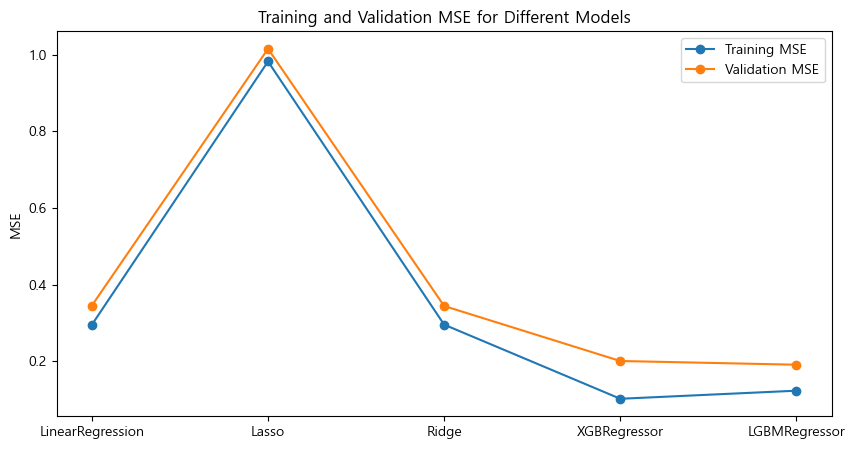

In [84]:
#결과 시각화
plot_mse_for_models_line(models, X_train_processed, y_train, X_val_processed, y_val)

In [85]:
#모델 test평가
evaluate_models_on_test(models, X_test_processed, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	0.2802		72.96%
Lasso            	1.0367		-0.02%
Ridge            	0.2804		72.94%
XGBRegressor     	0.1664		83.95%
LGBMRegressor    	0.1571		84.84%


In [86]:
X_train.columns

Index(['계약년월', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '매매가격지수(아파트)',
       '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)',
       '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '아파트 건물면적_(천)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '강남구', '강동구',
       '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '

#xgboost early stop

[0]	validation_0-rmse:0.84742	validation_1-rmse:0.87334
[1]	validation_0-rmse:0.67194	validation_1-rmse:0.70574


[2]	validation_0-rmse:0.56215	validation_1-rmse:0.60683
[3]	validation_0-rmse:0.49162	validation_1-rmse:0.54796
[4]	validation_0-rmse:0.44969	validation_1-rmse:0.51074
[5]	validation_0-rmse:0.42470	validation_1-rmse:0.48799
[6]	validation_0-rmse:0.40683	validation_1-rmse:0.47475
[7]	validation_0-rmse:0.39534	validation_1-rmse:0.46547
[8]	validation_0-rmse:0.38831	validation_1-rmse:0.45998
[9]	validation_0-rmse:0.38061	validation_1-rmse:0.45461
[10]	validation_0-rmse:0.37596	validation_1-rmse:0.45092
[11]	validation_0-rmse:0.37188	validation_1-rmse:0.44664
[12]	validation_0-rmse:0.36978	validation_1-rmse:0.44487
[13]	validation_0-rmse:0.36599	validation_1-rmse:0.44248
[14]	validation_0-rmse:0.36473	validation_1-rmse:0.44224
[15]	validation_0-rmse:0.36288	validation_1-rmse:0.44103
[16]	validation_0-rmse:0.36194	validation_1-rmse:0.44082
[17]	validation_0-rmse:0.35794	validation_1-rmse:0.43909
[18]	validation_0-rmse:0.35677	validation_1-rmse:0.43912
[19]	validation_0-rmse:0.35441	validati

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[28]	validation_0-rmse:0.34592	validation_1-rmse:0.43896
[29]	validation_0-rmse:0.34559	validation_1-rmse:0.43888
[30]	validation_0-rmse:0.34512	validation_1-rmse:0.43913
[31]	validation_0-rmse:0.34476	validation_1-rmse:0.43909
[32]	validation_0-rmse:0.34428	validation_1-rmse:0.43890
[33]	validation_0-rmse:0.34342	validation_1-rmse:0.43944
[34]	validation_0-rmse:0.34304	validation_1-rmse:0.43981


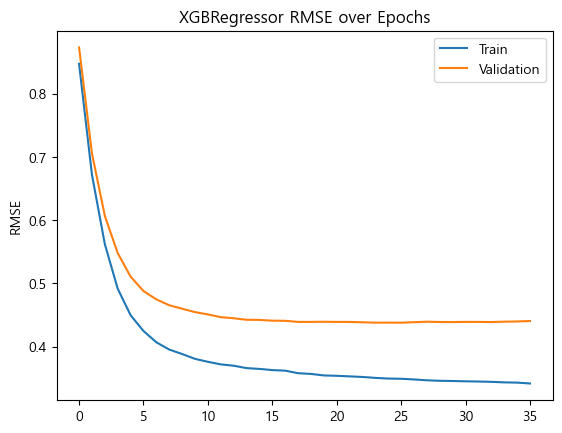

Xgboost Best Epoch:  25


In [87]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_processed, y_train), (X_val_processed, y_val)]
reg_xgb.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행
-Xgboost Best Epoch:  25

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_processed, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  0.1601140021629046
XGBoost Test R² Score: 84.55%


#light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[71]	valid_0's rmse: 0.436886	valid_0's l2: 0.190869


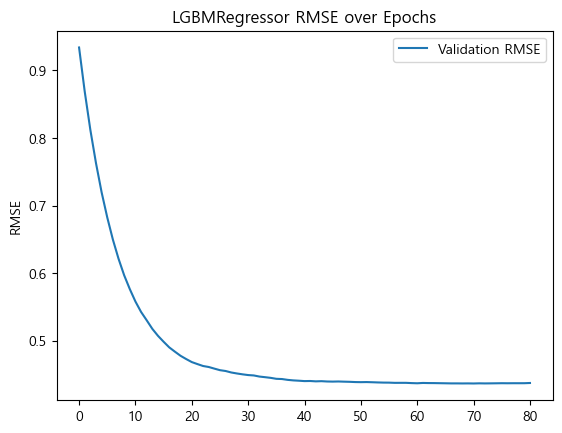

LGBM Best Epoch:  25


In [89]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_processed, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("LGBM Best Epoch: ", best_epoch)


# LGBM best_iteration으로 test 진행
LGBM Best Epoch:  25

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test MSE: ", mse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test MSE:  0.15803324003035638
LightGBM Test R² Score: 84.75%
